In [54]:
# Get system path 
import os
path = os.getcwd()
# Get parent directory
parent = os.path.dirname(path)
#Add parent directory to system path
os.sys.path.insert(0, parent)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
import sys
import platform
from scipy.spatial import KDTree
from sympy import flatten


from lib.utils import *
from lib.plot_utils import *
from lib.event_processing import *
from lib.som_training import *

#Dynamicaly reload modules in juptyer notebook
%load_ext autoreload 
%autoreload 2

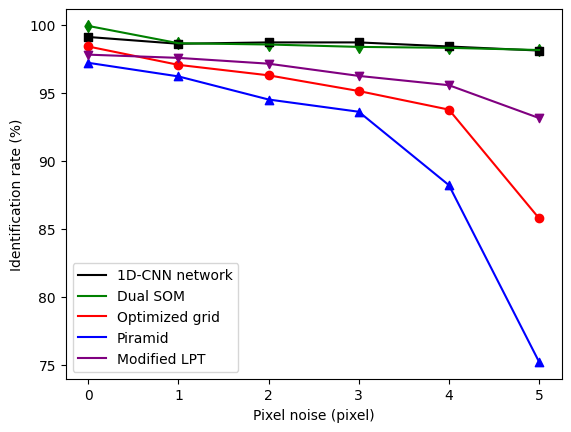

In [44]:
# Noise plot 
# 85.8%, 75.3%, 93.1%, 98.1%
# som_agorithm =
dual_SOM= [99.91239597021465, 98.63994743758212, 98.54577310556284, 98.37056504599211, 98.30048182216382, 98.14060446780552]
d1_CNN_network = [99.1,98.6,98.7,98.7,98.4,98.1]
optimiced_grid = [98.4,97.04916191075361,96.27937806138499,95.12470228733204,93.75619766623227,85.75899878668045]
piramid = [97.2, 96.2,94.5,93.6, 88.2,75.2]
modified_lpt = [97.8, 97.56235114366602, 97.13469344957234, 96.23661229197562, 95.55235998142572, 93.135073922618]

# Plot the noise plot in a x scale of 0-5

x = list(range(0,6))
fig, ax = plt.subplots()
ax.scatter(x, dual_SOM, marker='d', color='green')
ax.scatter(x, d1_CNN_network,marker='s', color='black')
ax.plot(x, d1_CNN_network, label='1D-CNN network', color='black')

ax.plot(x, dual_SOM, label='Dual SOM', color='green')

ax.plot(x, optimiced_grid, label='Optimized grid', color='red')
ax.plot(x, piramid, label='Piramid', color='blue')
ax.plot(x, modified_lpt, label='Modified LPT', color='purple')
ax.set(xlabel='Pixel noise (pixel)', ylabel='Identification rate (%)',)
#Draw datapoints
ax.scatter(x, optimiced_grid, marker='o', color='red')
ax.scatter(x, piramid, marker='^', color='blue')
ax.scatter(x, modified_lpt, marker='v', color='purple')
ax.set_xticks(x)
ax.legend()
plt.show()


When the positional noise is 5 pixels, the identification
rate of the optimized grid algorithm, pyramid algorithm, modified LPT algorithm and
the proposed algorithm are 85.8%, 75.3%, 93.1%, 98.1%, respectively.

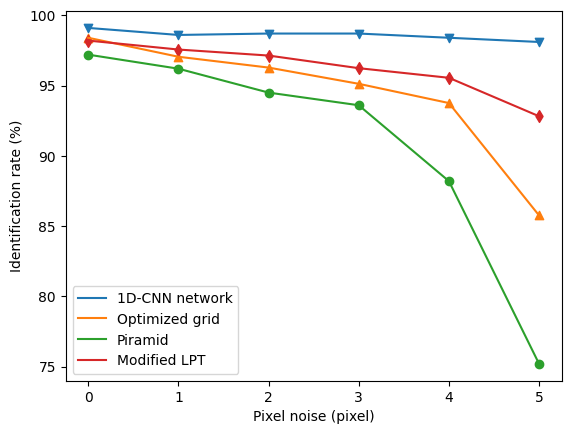

# False stars 

In [74]:
catalog_path = '../data/catalogs/tycho2_VT_6.csv'
stars_data_df = get_star_dataset(type ='tycho', path = catalog_path)

# If data type is a dataframe from a catalog transform it to array
if isinstance(stars_data_df, pd.DataFrame):
    # stars_data['data_number'] = stars_data.index
    stars_data = stars_data_df[['RA(ICRS)', 'DE(ICRS)']].values

print(stars_data.shape)


(4566, 2)


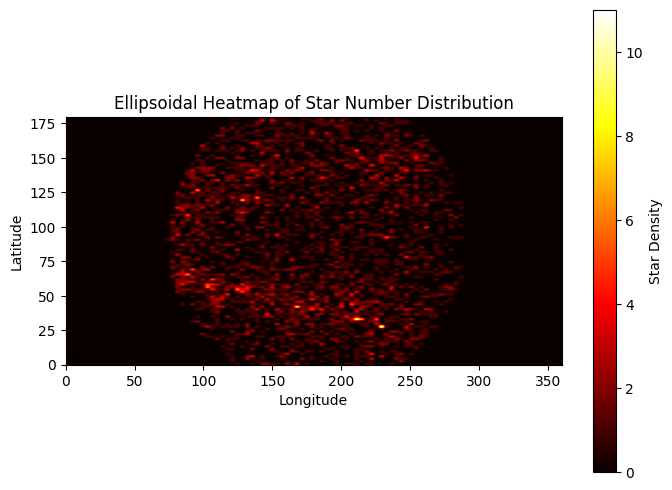

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create an ellipsoidal heatmap
def create_ellipsoidal_heatmap( max_x, max_y, star_positions):
    # Generate random star positions
    bins = 100
    # Create a 2D histogram to represent the star density
    heatmap, xedges, yedges = np.histogram2d(star_positions[:,0], star_positions[:,1], bins=bins)

    # Create a Gaussian filter to make the heatmap ellipsoidal
    x, y = np.meshgrid(np.arange(bins), np.arange(bins))
    x0, y0 = bins/2, bins/2  # Center of the ellipse
    a, b = int(bins*0.3), int(bins*0.6)    # Major and minor axes lengths
    ellipse = ((x - x0) / a) ** 2 + ((y - y0) / b) ** 2 <= 1

    # Apply the Gaussian filter to the heatmap
    heatmap *= ellipse

    return heatmap

# Parameters
num_stars = 1000  # Number of stars
max_x = 360  # Maximum x-coordinate
max_y = 180  # Maximum y-coordinate

# Create the ellipsoidal heatmap
heatmap = create_ellipsoidal_heatmap(max_x, max_y, stars_data)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, extent=[0, max_x, 0, max_y], origin='lower', cmap='hot')
plt.colorbar(label='Star Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ellipsoidal Heatmap of Star Number Distribution')
plt.show()


[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.
   0.  0.  0.  0.  1.  1.]
 [ 2.  1.  1.  1.  2.  1.  2.  2.  3.  3.  4.  5.  4.  3.  2.  3.  2.  1.
   2.  1.  2.  1.  1.  1.]
 [ 2.  2.  1.  1.  1.  2.  3.  6. 10.  7.  6.  4.  5.  5.  4.  4.  5.  4.
   3.  2.  1.  1.  2.  2.]
 [ 1.  2.  3.  2.  2.  4.  7. 10.  6.  5.  2.  3.  3.  4.  3.  6.  6.  6.
   6.  3.  2.  4.  3.  2.]
 [ 4.  2.  2.  3.  3.  4.  6. 11.  4.  3.  2.  2.  3.  3.  4.  6.  6.  4.
   7.  6.  3.  4.  3.  3.]
 [ 3.  3.  3.  5.  5. 10.  8.  6.  3.  3.  3.  2.  3.  2.  3.  3.  3.  2.
   5.  4.  4.  3.  5.  3.]
 [ 1.  2.  4.  3.  8.  7.  6.  5.  4.  3.  2.  4.  2.  3.  3.  3.  4.  3.
   4.  5.  3.  2.  4.  5.]
 [ 3.  4.  6.  5.  9.  6.  4.  6.  4.  2.  2.  2.  5.  3.  3.  4.  3.  5.
   6.  6.  6.  3.  2.  2.]
 [ 3.  3.  4.  5.  3.  5.  2.  2.  1.  3.  4.  2.  1.  2.  1.  4.  3.  3.
   5.  5.  6.  4.  5.  3.]
 [ 4.  3.  3.  5.  4.  2.  3.  3.  2.  3.  1.  1.  1.  2.  2.  2.  2.  3.
   2.  4.  4.  3.

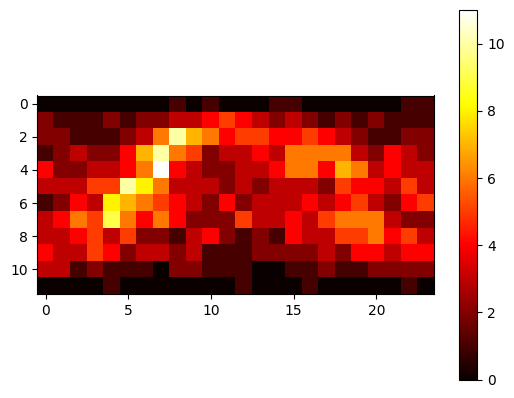

In [98]:

# Get the average star number in a 15x15 angle range of the stars in stars_data

if isinstance(stars_data_df, pd.DataFrame):
    # stars_data['data_number'] = stars_data.index
    position_stars_data = stars_data_df[['RA(ICRS)', 'DE(ICRS)']].values

position_stars_data[:,1]+=90

def calculate_average_stars(star_positions, max_x, max_y):
    averages = np.zeros((max_x // 15, max_y // 15))  # Initialize array for averages
    for i in range(0, max_x, 15):
        for j in range(0, max_y, 15):
            # Count stars in the current 15x15 area
            count = np.sum((star_positions[:,0] >= i) & (star_positions[:,0] < i + 15) & 
                           (star_positions[:,1] >= j) & (star_positions[:,1] < j + 15))
            # Calculate average and store in the array
            averages[i // 15, j // 15] = count   # 15x15 area has 225 pixels
    return averages

averages = calculate_average_stars(position_stars_data, 360, 180)
averages = np.array(averages // 5).T
print(averages)

# generate a set of n random stars in each cuadrant 
# n = 1
# max_x = 360
# max_y = 180
# star_positions = np.empty((0,2), int)
# for i in range(4):
#     star_positions = np.append(star_positions, np.random.randint(0, max_x, (n,2)), axis=0)

# Plot a heat map of the number of stars
plt.imshow(averages, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


Original Heatmap:
(12, 24)

Upscaled Heatmap:
(384, 768)


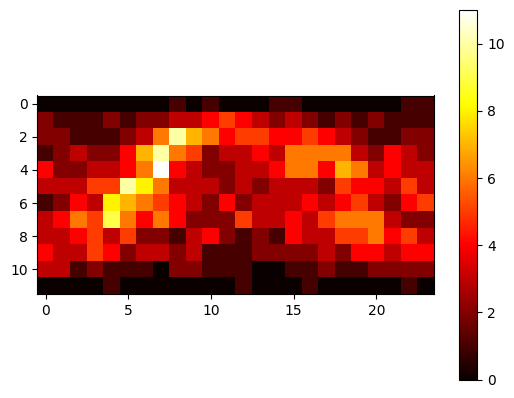

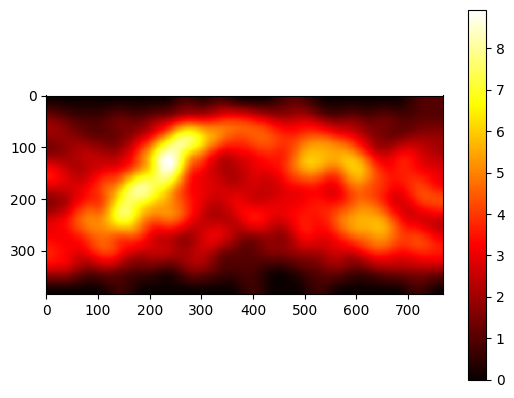

In [99]:
import numpy as np

def upscale_heatmap(heatmap, scale_factor):
    # Upsample the heatmap
    upscaled_heatmap = np.kron(heatmap, np.ones((scale_factor, scale_factor)))
    
    # Calculate the size of the new heatmap
    new_height, new_width = upscaled_heatmap.shape
    
    # Create a new heatmap with the extended size
    extended_heatmap = np.zeros((new_height, new_width))
    
    # Iterate through each pixel of the new heatmap
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the average value of the neighbors
            average_value = np.mean(upscaled_heatmap[max(i-1,0):min(i+2,new_height), 
                                                      max(j-1,0):min(j+2,new_width)])
            # Assign the average value to the corresponding pixel
            extended_heatmap[i, j] = average_value
            
    return extended_heatmap

# Example heatmap
heatmap = np.array([[4, 2],
                    [1, 2]])

# Upscale factor
scale_factor = 2

# Upscale the heatmap
upscaled_heatmap = upscale_heatmap(averages, scale_factor)

for i in range(4):
    upscaled_heatmap = upscale_heatmap(upscaled_heatmap, 2)


# Print the upscaled heatmap
print("Original Heatmap:")
print(averages.shape)
print("\nUpscaled Heatmap:")
print(upscaled_heatmap.shape)

plt.imshow(averages, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



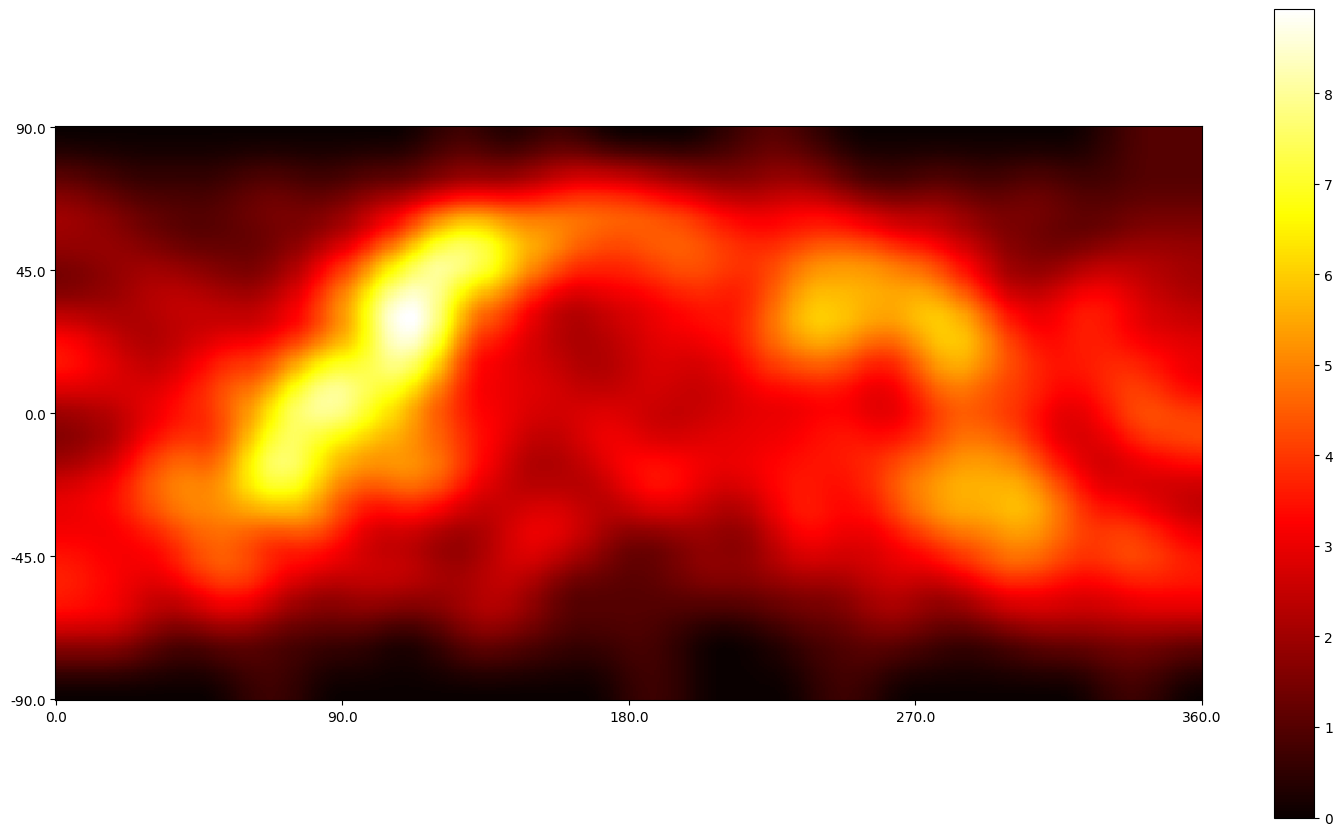

In [113]:
plt.imshow(upscaled_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()
#  increase size of the plot 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#Change the axis to show the correct values x: [0-360] y: 0-180


# Set the new tick values for the x-axis
n = 5
xticks = np.linspace(0, upscaled_heatmap.shape[1]-1, n)
xlabels = np.linspace(0, 360, n)
yticks = np.linspace(0, upscaled_heatmap.shape[0]-1, n)
ylabels = np.linspace(90, -90, n)

plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)



plt.show()

# COmputing time 